# Avito Demand Prediction Challenge

## Equipe:

* Catherine dos Santos Tostes - Aluna de Mestrado PPGI
* Jean
* Felipe

Este relatório tem como objetivo descrever as feautures do arquivo processado, descrever as estratégias no pré-processamento e na classificação dos dados, mostrando as diferenças entre os classificadores utilizados. Este trabalho foi realizado através da participação em uma competição do Kaggle da Avito Demand Prediction Challenge.

URL da Competição: https://www.kaggle.com/c/avito-demand-prediction

A Avito é um dos maiores sites de anúncios de produtos da Rússia com seções de categorias de diversos segmentos. O desafio da Avito trata de tentar prever se um produto irá ter uma alta demanda ou uma baixa demanda para que os vendedores saibam como otimizar as vendas e indicar aos vendedores o quanto de interesse o produto possa ter, para isso será feito uma análise do conteúdo da descrição dos produtos, aplicação de estratégias e classificadores para mostrar a diferença entre eles.

A classificação é uma forma de aplicar a aprendizagem supervisionada (Supervised Learning), ou seja, o algoritmo será treinado através de um conjunto de dados de entrada e irá classificar os dados, através do treinamento o algoritmo irá tentar prever os resultados.

## Importando módulos e Bibliotecas

Será importado os módulos e bibliotecas que serão necessários para a leitura do arquivo, para o processamento dos dados, a aplicação de métodos e classificadores, cálculos necessários para avaliação e criação de gráficos representativos do problema.

In [12]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Iremos carregar e ler o arquivo de treinamento e o arquivo de teste que está disponível com o nome de train.csv e test.csv respectivamente, será utilizado o DataFrame do Pandas, que é uma biblioteca para auxiliar na análise de dados tabulares bidimensionais.

In [3]:
#Dataset de treinamento
dataset_train = pd.read_csv('train.csv')

Com o arquivo de treinamento carregado, para se entender os dados será utilizado uma função head() do Pandas para exibir as 3 primeiras linhas do arquivo de treinamento.

In [4]:
dataset_train.head(3)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032,0.43177


Podemos saber quais são as colunas do arquivo através da função keys().

In [5]:
dataset_train.keys()

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

Iremos carregar e ler o arquivo de treinamento e o arquivo de teste que está disponível com o nome de train.csv e test.csv respectivamente, será utilizado o DataFrame do Pandas, que é uma biblioteca para auxiliar na análise de dados tabulares bidimensionais.

In [6]:
#Dataset de teste
dataset_test = pd.read_csv('test.csv')

Pode-se notar que ele está dividido em 18 colunas:

* item_id: Contém a String de código de cada item à venda.
* user_id: Contém a String de código de cada usuário.
* region: De qual região da Rússia o usuário faz parte.
* city: De qual cidade da Rússia o usuário faz parte.
* parent_category_name: Nome da categoria que o produto faz parte.
* category_name: Nome da sub-categoria que o produto faz parte.
* param_1: Tipo do produto.
* param_2: Tipo do produto.
* param_3: Tipo do produto.
* title: Título do produto à venda.
* description: Descrição do produto à venda.
* price: Preço do produto.
* item_seq_number: Número de sequência do produto.
* activation_date: Data de divulgação do produto.
* user_type: Tipo de usuário (se é pessoal ou empresarial).
* image: Imagem.
* image_top_1: Tamanho da Imagem.
* deal_probability: Probabilidade de venda do produto.

Serão retirados todos os dados que possam ser considerados irrelevantes para a realização dos processos seguintes. As colunas region, city, param_2, param_3, item_seq_number, user_type, image, image_top_1 serão retiradas para as futuras análises.

In [7]:
dataset_train = dataset_train[['item_id', 'user_id', 'parent_category_name', 'category_name', 'param_1', 'title', 'description', 'price', 'activation_date', 'deal_probability']]
dataset_test = dataset_test[['item_id', 'user_id', 'parent_category_name', 'category_name', 'param_1', 'title', 'description', 'price', 'activation_date']]

Para entender mais sobre os dados será realizado a contagem das linhas e colunas respectivamente na base de dados de treinamento e teste.

In [8]:
print('Dataset Treinamento: ', dataset_train.shape)
print('Dataset Teste: ', dataset_test.shape)

Dataset Treinamento:  (1503424, 10)
Dataset Teste:  (508438, 9)


Contagem dos dados não-nulos de cada categoria:

In [9]:
print('Dataset Treinamento:')
print(dataset_train.count())
print('\nDataset Teste:')
print(dataset_test.count())

Dataset Treinamento:
item_id                 1503424
user_id                 1503424
parent_category_name    1503424
category_name           1503424
param_1                 1441848
title                   1503424
description             1387148
price                   1418062
activation_date         1503424
deal_probability        1503424
dtype: int64

Dataset Teste:
item_id                 508438
user_id                 508438
parent_category_name    508438
category_name           508438
param_1                 485528
title                   508438
description             508438
price                   477853
activation_date         508438
dtype: int64


Para apresentação das estatísticas dos dados que ficaram após esse filtro de colunas de interesse para realização do algoritmo de aprendizado, será utilizada a função describe() para se obter a quantidadde total, a média, o sevio padrão, o valor mínimo, os quantis, e o valor máximo da coluna price e deal_probability.

In [10]:
dataset_train.describe()

,price,deal_probability
count,1.418062e+06,1503424.000000
mean,3.167081e+05,0.139131
std,6.689154e+07,0.260079
min,0.000000e+00,0.000000
25%,5.000000e+02,0.000000
50%,1.300000e+03,0.000000
75%,7.000000e+03,0.150870
max,7.950101e+10,1.000000


Abaixo é possível ver a distribuição das probabilidades de venda:

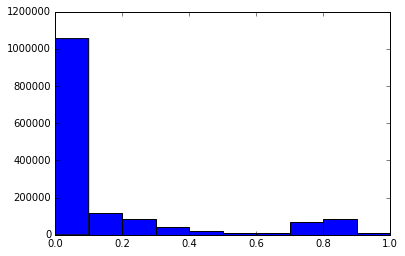

In [13]:
plt.hist(dataset_train['deal_probability'])
plt.show()

## Pré-Processamento

Alguns modelos de treinamento precisam ser pré-processados para serem normalizados antes de se realizar algum tipo de análise, para que a aplicação dos métodos de classificação não sejam feitos de forma ineficiente, gerando resultados não satisfatórios.

A padronização será realizada por partes.

Primeiramente será separado por classes em alta probabilidade, média probabilidade e baixa probabilidade:

In [11]:
high_probability = []
average_probability = []
low_probability = []

for value in dataset_train['deal_probability']:
    if value >= 0.67:
        high_probability.append(value)
    elif value > 0.33 and value < 0.67:
        average_probability.append(value)
    else:
        low_probability.append(value)

### Criando o Bag of Words

Será retirado do texto todos os sopwords (palavras presentes que não tem relevância para o texto ao qual está inserido) através do módulo nltk será importado para o uso de uma biblioteca em russo com as palavras armazenadas.

Agora os dados do título do produto serão tratados através do módulo CountVectorizer do Scikit-Learn.

O CountVectorizer transformará as palavras do título para uma forma que os algoritmos de aprendizado de máquina reconhecem, pois eles esperam vetores numéricos, o texto será transformado em uma matriz e será realizado a técnica de bag of words.

Este módulo converte uma coleção de documentos de texto em uma matriz de contagens de tokens. Com a frequência de cada String é criado um vetor de frequências para um documento, criando uma amostra multivariada. Transformar uma coleção de documento em vetores numéricos é chamado de vetorização utilizando a estratégia dee bag of words ou bag of n-grams.

Cada frequência de ocorrência de token individual (normalizada ou não) é tratada como um recurso.

In [12]:
filtered_words = [word for word in dataset_train['title'] if word not in stopwords.words('russian')]
vector = CountVectorizer(lowercase=True)
bag_of_words = vector.fit_transform(filtered_words)
bag_of_words.shape

(1503424, 206935)

## Aplicação dos Classificadores

Com o pré-processamento dos dados a serem utilizados, a representação dos documentos agora como uma matriz de frequência de ocorrências, o algoritmo de aprendizado de máquina poderá aplicar classificadores para o treinamento do modelo a ser utilizado.

Foram escolhidos para serem utilizados os seguintes classificadores:
* Rede Neural
* Multinomial Naive Bayes
* Support Vector Machine (SVM)
* Support Vector Regression (SVR)

Primeiramente será realizado a separação dos dados para treinamento e teste dos arquivos do dataset, através de uma amostra será realizado a aplicação dos classificadores.

In [13]:
X = bag_of_words
y = dataset_train['deal_probability'].values

n=100

X_train = X[:n]
X_test = X[n:]
y_train = y[:n]
y_test = y[n:]

Iremos obter a média do y_train e do y_test:

In [15]:
media_y_train = np.mean(y_train)
media_y_test = np.mean(y_test)
print('Média y_train: ',media_y_train)
print('Média y_test: ',media_y_test)

Média y_train:  0.1971213
Média y_test:  0.139126718279


Alguns modelos de classificadores utilizam apenas valores discretos para suas aplicações, e nossos dados são valores contínuos, então será realizado uma conversão para valor discreto, e quando uma aplicação de modelo necessitá-lo ele será usado.

In [16]:
y_train_discret = preprocessing.LabelEncoder().fit_transform(y_train)

### Rede Neural

O algoritmo do Perceptron multi-camadas, aprende um aproximador de função não linear para classificação ou regressão. Através do módulo MLPClassifier que implementa um perceptron multi-camadas através da técnica de Backpropagation.

In [17]:
mlp_classifier = None
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train_discret)
mlp_predict = mlp_classifier.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Com o algoritmo da rede neural implementado sobre os dados do dataset, podemos visualizar o resultado do treinamento com o predict e o valor esperado:

In [20]:
probabilidade = pd.DataFrame({'Expected': y_test, 'Predicted': mlp_predict})
probabilidade.head(10)

,Expected,Predicted
0,0.00000,0
1,0.00000,0
2,0.86521,0
3,0.00000,0
4,0.12579,0
5,0.00000,0
6,0.00000,4
7,0.73760,0
8,0.00000,0
9,0.00000,0


### Multinomial Naive Bayes

O algoritmo é baseado no Teorema de Bayes, com a independência de cada dado, muito utilizada na classificação de texto, com contagens vetoriais de palavras.

In [22]:
multinomial_naive_bayes = None
multinomial_naive_bayes = MultinomialNB()
multinomial_naive_bayes.fit(X_train, y_train_discret)
multinomial_predict = multinomial_naive_bayes.predict(X_test)

Com o modelo de classificação Multinomial de Naive Bayes implementado sobre os dados do dataset, podemos visualizar o resultado do treinamento com o predict e o valor esperado:

In [23]:
probabilidade = pd.DataFrame({'Expected': y_test, 'Predicted': multinomial_predict})
probabilidade.head(10)

,Expected,Predicted
0,0.00000,0
1,0.00000,0
2,0.86521,0
3,0.00000,0
4,0.12579,0
5,0.00000,0
6,0.00000,0
7,0.73760,0
8,0.00000,0
9,0.00000,0


### Support Vector Machine (SVM)

O modelo de classificação supervisionado SVM é um modelo usado para classificação, regressão e detecção de outliers presentes nos dados.

In [24]:
support_vector_machine = None
support_vector_machine = svm.SVC()
support_vector_machine.fit(X_train, y_train_discret)
svm_predict = support_vector_machine.predict(X_test)

Com o modelo de classificação Support Vector Machine (SVM) implementado sobre os dados do dataset, podemos visualizar o resultado do treinamento com o predict e o valor esperado:

In [25]:
probabilidade = pd.DataFrame({'Expected': y_test, 'Predicted': svm_predict})
probabilidade.head(10)

,Expected,Predicted
0,0.00000,0
1,0.00000,0
2,0.86521,0
3,0.00000,0
4,0.12579,0
5,0.00000,0
6,0.00000,0
7,0.73760,0
8,0.00000,0
9,0.00000,0


### Support Vector Regression (SVR)

A SVR é uma versão da support vector machine para regressões.

In [31]:
support_vector_regression = None
support_vector_regression = SVR() 
support_vector_regression.fit(X_train, y_train)
svr_predict = support_vector_regression.predict(X_test)

Com o modelo de classificação Support Vector Regression (SVR) implementado sobre os dados do dataset, podemos visualizar o resultado do treinamento com o predict e o valor esperado:

In [32]:
probabilidade = pd.DataFrame({'Expected': y_test, 'Predicted': svr_predict})
probabilidade.head(10)

,Expected,Predicted
0,0.00000,0.100014
1,0.00000,0.100014
2,0.86521,0.100014
3,0.00000,0.100014
4,0.12579,0.100005
5,0.00000,0.100014
6,0.00000,0.100024
7,0.73760,0.100024
8,0.00000,0.100024
9,0.00000,0.100014


### Regressão Linear

O modelo de regressão linear realiza o ajuste do algoritmo de aprendizado dos dados de entrada e o valor previsto para a aproximação linear.

In [34]:
linear_regression = None
linear_regression = LinearRegression() 
linear_regression.fit(X_train, y_train)
linear_regression_predict = linear_regression.predict(X_test)

Com o modelo de classificação de Regressão Linear implementado sobre os dados do dataset, podemos visualizar o resultado do treinamento com o predict e o valor esperado:

In [35]:
probabilidade = pd.DataFrame({'Expected': y_test, 'Predicted': linear_regression_predict})
probabilidade.head(10)

,Expected,Predicted
0,0.00000,1.971213e-01
1,0.00000,1.971213e-01
2,0.86521,1.971213e-01
3,0.00000,2.333975e-01
4,0.12579,-3.969770e-08
5,0.00000,1.971213e-01
6,0.00000,1.684445e-01
7,0.73760,1.720607e-01
8,0.00000,4.051763e-01
9,0.00000,-1.568040e-02
